<center> <font size = 6 color = 'steelblue'> <b>Reinforcement Learning with Policy Gradients:
<center> <font size = 6
 color = 'steelblue'> <b>Solving LunarLander-v2

<div class="alert alert-block alert-success">
<font size = 4>

This notebook explores reinforcement learning (RL), focusing on the use of **Policy Gradient** methods to solve the **LunarLander-v2** environment from OpenAI Gym.

<font size = 6 color = 'midnightblue'> <b>Objective of LunarLander-v2

<div class="alert alert-block alert-success">
<font size = 4>
    
- The **LunarLander-v2** is a simulation where the goal is to land a spacecraft on the moon safely.
- The lander starts in the air and must make a soft landing between two flags on a landing pad.
- The player controls the lander's engines, trying to minimize fuel consumption while avoiding crashing or tipping over.
- Successful landings yield positive points, while using too much fuel or crashing will result in penalties.

## <center> ![Alt Text](https://www.gymlibrary.dev/_images/lunar_lander.gif)

<font size = 6 color = 'midnightblue'> <b> What is Policy Gradients?

<div class="alert alert-block alert-success">
<font size = 4>
    
- Policy gradient methods are a class of reinforcement learning algorithms that directly parameterize and optimize the policy.
- Unlike value-based methods, which first learn the value of actions and then derive a policy, policy gradients adjust the policy directly based on the received reward signal.

<div class="alert alert-block alert-info">
<font size = 4>
    
<b>In this notebook, you will:</b>

- **Understand the Environment**:
> Dive into the dynamics of the 'LunarLander-v2'environment.
> Summarize the state observations, possible actions, and reward structure.

- **Implement Policy Gradients**:
> Learn to implement a Policy Gradient algorithm, a powerful technique in RL for solving environments with high-dimensional action spaces or continuous action spaces.

- **Train Your Agent**:
> Train an agent from scratch to successfully land the lunar module.
> Observe the agent improve over time, learning from each landing attempt.

- **Evaluate and Iterate**:
> Evaluate the performance of your agent, visualize its learning progress, and understand the key metrics indicative of successful learning.

<font size = 5 color = 'seagreen'> <b> Setup

<div class="alert alert-block alert-info">
<font size = 4>

<b>Make sure that all the required libraries are installed.

```
pip install gym==0.25.2

pip install swig

pip install "gym[box2d]"
```


In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

2023-12-29 23:15:17.297180: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

<font size = 6 color = 'midnightblue'> <b> Introduction to OpenAI Gym

<div class="alert alert-block alert-success">
<font size = 4>
    
- Utilize OpenAI Gym, an excellent resource for crafting and evaluating reinforcement learning models.
- It offers a variety of scenarios for your learning agents to engage with.
    
    

In [ ]:
import gym

<div class="alert alert-block alert-success">
<font size = 4>
    
The `gym.envs.registry.all()` function is a part of the OpenAI Gym library.
Here's a breakdown of its purpose and use:

- **Purpose**:
> - The function returns a container of all the available environments that can be created and used in OpenAI Gym. <br>
> - This is particularly useful for getting a comprehensive list of all the different simulation environments one can experiment with.<br>
> - Ranging from classic control tasks, Atari games, to robotic simulations.


- **Common Use Case**:
> - This function is commonly used to explore the different environments available in Gym.
> - Or to verify the existence and details of a specific environment.
> - For instance, it can help you discover new environments to test your reinforcement learning algorithms.

<b>
    

---
     PS: Mention of below code line in this notebook is just informational. Its presence or absence doesn't affect the working of this notebook
    
---

In [ ]:
gym.envs.registry.all()

/opt/anaconda3/envs/rl/lib/python3.10/site-packages/gym/envs/registration.py:421: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(


dict_values([EnvSpec(id='CartPole-v0', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=195.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='CartPole', version=0), EnvSpec(id='CartPole-v1', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='CartPole', version=1), EnvSpec(id='MountainCar-v0', entry_point='gym.envs.classic_control.mountain_car:MountainCarEnv', reward_threshold=-110.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='MountainCar', version=0), EnvSpec(id='MountainCarContinuous-v0', entry_point='gym.envs.classic_control.co

<div class="alert alert-block alert-info">
<font size = 4><center><b>
    Let's start by creating a LunarLander-v2 environment!

<div class="alert alert-block alert-success">
<font size = 4>
    
<b>The code snippet is used to initialize an environment for the Lunar Lander game (version 2) using OpenAI's Gym library.

<b>Here's a breakdown of what each line does:

<b>1. `env = gym.make("LunarLander-v2")`:
    
> * This line creates a new environment instance for the Lunar Lander v2 game.<br>
> * The `gym.make()` function is used to instantiate a new environment, in this case, LunarLander-v2.

<b>2. `env.seed(42)`:
    
> * This line sets the seed for the environment's random number generator to 42.
> * Seeding the environment makes the process deterministic, which is helpful for reproducibility and debugging.
> * The number 42 is arbitrary and can be replaced with any integer.

<b>3. `obs = env.reset()`:

> * This line resets the environment to an initial state and returns the initial observation.
> * The `reset` method is typically called before starting an episode, and the returned `obs` variable represents the first observation of the environment.

<b>4. `obs`:

>* This simply represents the variable holding the initial observation of the environment after reset.
>* It is typically an array representing the state of the environment, which includes various numerical values such as the position and velocity of the lander.


In [ ]:
env = gym.make("LunarLander-v2")

env.seed(42)
obs = env.reset()
obs

/opt/anaconda3/envs/rl/lib/python3.10/site-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


array([ 0.00229702,  1.4181306 ,  0.2326471 ,  0.3204666 , -0.00265488,
       -0.05269805,  0.        ,  0.        ], dtype=float32)

<div class="alert alert-block alert-success">
<font size = 4>
    
<b> These each 8D observation (x, y, h, v, a, w, l, r) correspond to:
    
* x, y:
    - The coordinates of the spaceship
    - It starts at a random location near (0, 1.4) and must land near the target at (0, 0).
* h, v:
    - The horizontal and vertical speed of the spaceship
    - It starts with a small random speed.
* a, w:
    - The spaceship's angle and angular velocity
* l, r:
    - Whether the left or right leg touches the ground (1.0) or not (0.0).

<font size = 5 color = 'seagreen'> <b>Explore the action space of the LunarLander V2 environment
<div class="alert alert-block alert-success">
<font size = 4>

- The `env.action_space` attribute is part of the OpenAI Gym environment's interface.
- It describes the format and range of possible actions that an agent can take in the environment.
- Specifically, for the "LunarLander-v2" environment, here's what it signifies:

>- **`env.action_space`**:
>>- This attribute provides a space object that defines the set of valid actions.
>>- In the context of the Lunar Lander v2 game, the action space defines what kind of moves or actions the lander can take at any step during the simulation.
>>- The Lunar Lander's actions typically include discrete movements such as firing the left orientation engine, the main engine, the right orientation engine, or no action.

>- By querying `env.action_space`, an understanding of the structure, type (e.g., discrete or continuous), and range of the actions that the agent can performed.
>- This information is crucial for designing the agent's decision-making process.
>- The agent needs to know what actions are available to interact effectively with the environment.

<div class="alert alert-block alert-info">
<font size = 4>
  <b>  

---
<b>In summary,

- `env.action_space` is used to understand and interact with the Lunar Lander's possible actions within the simulation environment provided by OpenAI Gym.

---

<font size = 4 color= blue> <b>The action space is discrete, with 4 possible actions:

In [ ]:
env.action_space

Discrete(4)

<div class="alert alert-block alert-success">
<font size = 4>

<b>These actions are:
    
* Do nothing
* Fire left orientation engine
* Fire main engine
* Fire right orientation engine

<font size = 5 color = 'seagreen'> <b>Create a simple policy network with 4 output neurons (one per possible action)

<div class="alert alert-block alert-success">
<font size = 4>
    
<b> Following code snippet is setting up a neural network model using Keras, a high-level neural networks API, for a reinforcement learning task in the Lunar Lander environment from OpenAI Gym.
    

<b> Here's a breakdown of what each part of the code does:
   
1. `keras.backend.clear_session()`:
>- This line clears any existing model from memory.
>- It's good practice to start with a clean state when you're creating a new model, as this ensures the model's variables do not interfere with those from previous models.

2. `np.random.seed(42)`:
>- Sets the seed for NumPy's random number generator to 42, which ensures reproducibility of the results by initializing the random number generator to a fixed state.

3. `tf.random.set_seed(42)`:
>-  Similarly, sets the seed for TensorFlow's random number generator to 42, ensuring that the random numbers generated by TensorFlow are predictable and reproducible.

4. `n_inputs = env.observation_space.shape[0]`:
>- This line determines the number of input features for the neural network, which corresponds to the size of the observation space from the Lunar Lander environment.
>- It's dynamically setting the number of inputs based on the environment's specifications.

5. `n_outputs = env.action_space.n`:
>- Determines the number of output neurons needed for the network, which corresponds to the number of possible actions in the Lunar Lander environment's action space.

6. The last section is defining a sequential neural network model using Keras:
>- It's a simple feed-forward network with two hidden layers, each with 32 neurons and 'relu' activation functions.
>- The input shape of the first layer is set to `[n_inputs]` to match the environment's observation space.
>- The output layer has `n_outputs` neurons, one for each possible action, and uses a 'softmax' activation function to output a probability distribution over all possible actions.

<div class="alert alert-block alert-info">
<font size = 4>
  <b>  
      
---
In summary,
- This code is constructing a neural network that takes the state of the Lunar Lander as input and outputs a probability distribution over possible actions to take.
- It's a typical setup for a policy network in reinforcement learning, where the agent learns to decide the best action to take in each state.
    
---

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

n_inputs = env.observation_space.shape[0]
n_outputs = env.action_space.n

model = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=[n_inputs]),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(n_outputs, activation="softmax"),
])

<font size = 5 color = 'seagreen'> <b>Define functions to execute the single steps as well as episodes for the training process

<div class="alert alert-block alert-success">
<font size = 4>
  <b>  
      
This code defines two functions for implementing a training loop in reinforcement learning using policy gradients on the Lunar Lander environment from OpenAI Gym:

1. `lander_play_one_step`:
>- This function takes a single step in the environment using the current observation and model to choose an action.
>- It computes the probability of each action, selects one action using these probabilities, and calculates the loss to perform a gradient update.
>- The function returns the new observation, reward for the taken action, whether the episode is done, and the gradients calculated for updating the model.

2. `lander_play_multiple_episodes`:
>- This function orchestrates the training process over multiple episodes.
>- It resets the environment at the start of each episode and calls `lander_play_one_step` repeatedly until the episode is done or a maximum number of steps is reached.
>- It collects rewards and gradients for each step to use in optimizing the model.
>- Finally, it returns the total rewards and gradients collected over all episodes.

Overall, these functions are part of a reinforcement learning setup, where `lander_play_multiple_episodes` is used to play multiple episodes of the Lunar Lander game, collecting experience in terms of rewards and gradients for training a policy model represented by `model`.


In [ ]:
def lander_play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        probas = model(obs[np.newaxis])
        logits = tf.math.log(probas + keras.backend.epsilon())
        action = tf.random.categorical(logits, num_samples=1)
        loss = tf.reduce_mean(loss_fn(action, probas))
    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, info = env.step(action[0, 0].numpy())
    return obs, reward, done, grads

def lander_play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, grads = lander_play_one_step(env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done:
                break
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)
    return all_rewards, all_grads

<font size = 5 color = 'seagreen'> <b>Define functions to process rewards

<div class="alert alert-block alert-success">
<font size = 4>
  <b>  
Following functions are part of a reinforcement learning algorithm, specifically for processing rewards in policy gradient methods:
    </b>   

<b>1. `discount_rewards`:</b>

- This function takes a sequence of rewards from a single episode and applies a discount factor to calculate the total expected future rewards for each step.
- It iteratively updates each reward with the sum of all future discounted rewards, effectively valuing immediate rewards more than distant ones in the future.
    
<b>2. `discount_and_normalize_rewards`: </b>
    
- This function applies the discounting to all episodes' rewards using the `discount_rewards` function and then normalizes them.
- Normalization is done by subtracting the mean and dividing by the standard deviation of the concatenated discounted rewards from all episodes.
- This process helps in stabilizing the learning algorithm by keeping the reward scale consistent across updates.

<div class="alert alert-block alert-info">
<font size = 4>
    
Together, these functions prepare the rewards from multiple episodes for efficient learning in policy gradient methods by discounting and normalizing them, which is a common practice in reinforcement learning to improve convergence.

In [ ]:
def discount_rewards(rewards, discount_rate):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_rate
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

<font size = 5 color = 'seagreen'> <b>Define hyperparameters

<div class="alert alert-block alert-success">
<font size = 4>
  <b>  
      
Following code snippet sets up several key hyperparameters for a reinforcement learning training loop, specifically for a policy gradient method:</b>

- `n_iterations`:
    - This is the number of total training iterations to perform.
    - Each iteration will likely involve one or more episodes of interaction with the environment, followed by a learning update.

- `n_episodes_per_update`:
    - This specifies the number of episodes to run before updating the model.
    - In policy gradient methods, it's common to collect several episodes of experience and then perform an update to the policy network all at once using the aggregated data.

- `n_max_steps`:
    - This defines the maximum number of steps to take in each episode.
    - It acts as a cutoff to ensure that episodes don't run indefinitely, which is particularly important in environments where it's possible to not reach a terminal state quickly.

- `discount_rate`:
    - This is the discount factor (often denoted as gamma in literature) used in calculating the discounted rewards.
    - It represents the degree to which future rewards are considered in the calculation of the total expected reward.
    - A discount rate close to 1 means future rewards are valued almost as highly as immediate rewards, whereas a lower discount rate prioritizes immediate rewards more heavily.

In [ ]:
n_iterations = 200
n_episodes_per_update = 16
n_max_steps = 1000
discount_rate = 0.99

<font size = 5 color = 'seagreen'> <b>Define optimizer and loss function

<div class="alert alert-block alert-success">
<font size = 4>
  <b>  
      
The given code snippet is configuring key components for training a neural network model in a machine learning or deep learning context using the Keras library:</b>

- `optimizer = keras.optimizers.Nadam(learning_rate=0.005)`:
    - This line sets up the Nadam optimizer with a specified learning rate of 0.005.
    - Nadam is an optimization algorithm that combines the benefits of two other algorithms: RMSprop and Nesterov accelerated gradient.
    - It's known for being robust and effective in various scenarios, particularly in settings with noisy gradients or those requiring adaptive learning rates.
    - The learning rate controls how much to update the model in response to the estimated error each time the model weights are updated.

- `loss_fn = keras.losses.sparse_categorical_crossentropy`:
    - This line defines the loss function to be used in the model training, which is sparse categorical crossentropy.
    - This loss function is commonly used in classification tasks where the classes are mutually exclusive.
    - It is especially suited for scenarios where the target classes are provided as integers (as in sparse format), rather than one-hot encoded vectors.

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=0.005)
loss_fn = keras.losses.sparse_categorical_crossentropy

<font size = 5 color = 'seagreen'> <b>Define Training Loop

<div class="alert alert-block alert-success">
<font size = 4>
  <b>  
      
Folowing code is executing the training loop for an agent in the Lunar Lander environment using a policy gradient method. Here's the summarized workflow:</b>

- The loop runs for a specified number of iterations (`n_iterations`).
- In each iteration, it plays multiple episodes of the game (as per `n_episodes_per_update`) using the current policy model and collects rewards and gradients for each episode.
- It calculates the mean reward across all episodes in the current iteration to monitor the performance of the agent.
- This mean reward is appended to a list for later analysis or visualization.
- For each episode, it processes the collected rewards using a discounting and normalization function to prepare them for effective learning.
- It then calculates the mean gradients across all episodes.
- These gradients are scaled by the discounted and normalized rewards, aligning with the policy gradient method's objective of maximizing total expected rewards.
- Finally, it applies these mean gradients to the model's parameters using the defined optimizer, effectively updating the policy in the direction that increases expected rewards.

The loop represents a complete training cycle in reinforcement learning, aiming to improve the agent's policy to perform better in the Lunar Lander environment.

In [ ]:
env.seed(42)

mean_rewards = []

for iteration in range(n_iterations):
    all_rewards, all_grads = lander_play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, model, loss_fn)
    mean_reward = sum(map(sum, all_rewards)) / n_episodes_per_update
    print("\rIteration: {}/{}, mean reward: {:.1f}  ".format(
        iteration + 1, n_iterations, mean_reward), end="")
    mean_rewards.append(mean_reward)
    all_final_rewards = discount_and_normalize_rewards(all_rewards,
                                                       discount_rate)
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
                 for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

/opt/anaconda3/envs/rl/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Iteration: 200/200, mean reward: 147.0  

<font size = 5 color = 'seagreen'> <b>Let's look at the learning curve:

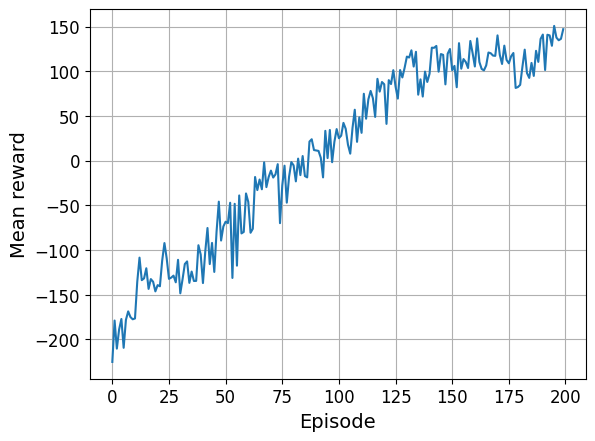

In [ ]:
import matplotlib.pyplot as plt

plt.plot(mean_rewards)
plt.xlabel("Episode")
plt.ylabel("Mean reward")
plt.grid()
plt.show()

<font size = 5 color = 'seagreen'> <b>Now let's look at the result!

<div class="alert alert-block alert-success">
<font size = 4>
      
- This code defines a function `lander_render_policy_net`, which is designed to visualize the policy network's behavior in the Lunar Lander environment:

- This function is used to visually demonstrate how a trained policy network performs in the Lunar Lander game, providing insights into the decision-making process and behavior of the agent.


In [ ]:
def lander_render_policy_net(model, n_max_steps=500, seed=42):
    frames = []
    env = gym.make("LunarLander-v2")
    env.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    obs = env.reset()
    for step in range(n_max_steps):
        frames.append(env.render(mode="rgb_array"))
        probas = model(obs[np.newaxis])
        logits = tf.math.log(probas + keras.backend.epsilon())
        action = tf.random.categorical(logits, num_samples=1)
        obs, reward, done, info = env.step(action[0, 0].numpy())
        if done:
            break
    env.close()
    return frames

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,
def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [ ]:
frames = lander_render_policy_net(model, seed=42)
plot_animation(frames)

<div class="alert alert-block alert-info">
<font size = 4> <center> <b>
    This model can be trained for longer time and/or the hyperparameters can be tweaked to see if it can get it to go over 200.